# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [80]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [81]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [82]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [83]:
from sklearn.model_selection import train_test_split as tts

*Divido el conjunto de datos en 80% entrenamiento y 20% prueba:*

In [84]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.2, 
                                       random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

*Ajustamos el modelo:*

In [85]:
from sklearn.linear_model import LinearRegression as LinReg

#iniciar el modelo

linreg = LinReg()

In [86]:
#entrenar el modelo

linreg.fit(X_train, y_train)

LinearRegression()

*Hacemos las predicciones en el conjunto de entrenamiento y prueba:*

In [87]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [88]:
y_train_pred[:5], y_test_pred[:5]

(array([[1.93725845],
        [2.48910616],
        [2.64735483],
        [1.56589492],
        [1.61312839]]),
 array([[0.71912284],
        [1.76401657],
        [2.70965883],
        [2.83892593],
        [2.60465725]]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [89]:
from sklearn.metrics import r2_score as r2

*Calcular R-squared para el conjunto de entrenamiento*:

In [90]:
r2_train = r2(y_train, y_train_pred)

*Calcular R-squared para el conjunto de prueba*:

In [91]:
r2_test = r2(y_test, y_test_pred)

In [92]:
r2_train,r2_test #Con los nuevos datos siempre lo va hacer un poco peor. Esta más o menos bien ajustado.

(0.6125511913966952, 0.5757877060324511)

In [93]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

In [94]:
linreg.coef_

array([[ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,
         7.83144907e-01, -2.02962058e-06, -3.52631849e-03,
        -4.19792487e-01, -4.33708065e-01]])

In [95]:
linreg.intercept_

array([-37.02327771])

## 4. Calculate and print mean squared error for both the training and the testing set.

In [96]:
from sklearn.metrics import mean_squared_error as mse

In [97]:
mse_train= mse(y_train, y_train_pred)
mse_test= mse(y_test, y_test_pred)

In [98]:
mse_train, mse_test

(0.5179331255246699, 0.555891598695244)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [99]:
from sklearn.metrics import mean_absolute_error as mae

*Calcular el Error Absoluto Medio para el conjunto de entrenamiento:*

In [100]:
mae_train = mae(y_train, y_train_pred)

*Calcular el Error Absoluto Medio para el conjunto de prueba:*

In [101]:
mae_test= mae(y_test, y_test_pred)

In [102]:
mae_train, mae_test

(0.5286283596581928, 0.5332001304956558)

## Classification Model Evaluation

In [103]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [104]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [105]:
from sklearn.model_selection import train_test_split as tts

*Divido el conjunto de datos en 80% entrenamiento y 20% prueba:*

In [106]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.2, 
                                       random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [113]:
from sklearn.linear_model import LogisticRegression as LogReg

*Ajustamos el modelo:*

In [114]:
#iniciar el modelo

logreg = LogReg()

In [115]:
#entrenar el modelo

logreg.fit(X_train, y_train)

LogisticRegression()

*Hacemos las predicciones en el conjunto de entrenamiento y prueba:*

In [127]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [128]:
y_prob = logreg.predict_proba(X_test)

In [129]:
y_train_pred[:5], y_test_pred[:5]

(array([0, 0, 1, 0, 0]), array([1, 0, 2, 1, 1]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [130]:
from sklearn.metrics import accuracy_score as acc

In [131]:
acc(y_train, y_train_pred)

0.975

In [132]:
acc(y_test, y_test_pred)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [133]:
from sklearn.metrics import balanced_accuracy_score

In [135]:
balanced_accuracy_score(y_train,y_train_pred)

0.975609756097561

In [134]:
balanced_accuracy_score(y_test,y_test_pred)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [136]:
from sklearn.metrics import precision_score as prec

In [138]:
prec(y_train, y_train_pred, average='weighted')

0.9767857142857144

In [137]:
prec(y_test, y_test_pred, average='weighted')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [139]:
from sklearn.metrics import recall_score as rec

In [141]:
rec(y_train, y_train_pred, average='weighted')

0.975

In [140]:
rec(y_test, y_test_pred, average='weighted')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [142]:
from sklearn.metrics import f1_score as f1

In [144]:
f1(y_train, y_train_pred, average='micro')

0.975

In [143]:
f1(y_test, y_test_pred, average='micro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [146]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [150]:
cm(y_train, y_train_pred)/cm(y_train, y_train_pred).sum()*100

array([[33.33333333,  0.        ,  0.        ],
       [ 0.        , 31.66666667,  2.5       ],
       [ 0.        ,  0.        , 32.5       ]])

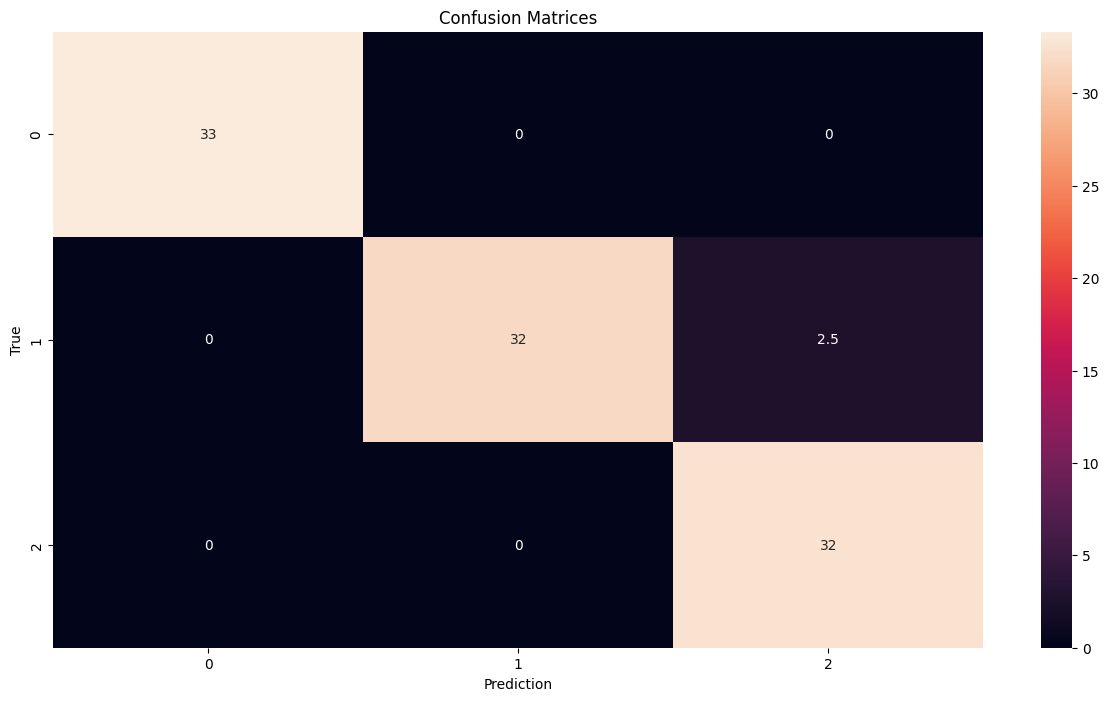

In [151]:
plt.figure(figsize=(15, 8)),
ax=sns.heatmap(cm(y_train, y_train_pred)/cm(y_train, y_train_pred).sum()*100,
annot=True),
plt.title('Confusion Matrices'),
plt.ylabel('True'),
plt.xlabel('Prediction'),
plt.show();

In [147]:
cm(y_test, y_test_pred)/cm(y_test, y_test_pred).sum()*100

array([[33.33333333,  0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        ],
       [ 0.        ,  0.        , 36.66666667]])

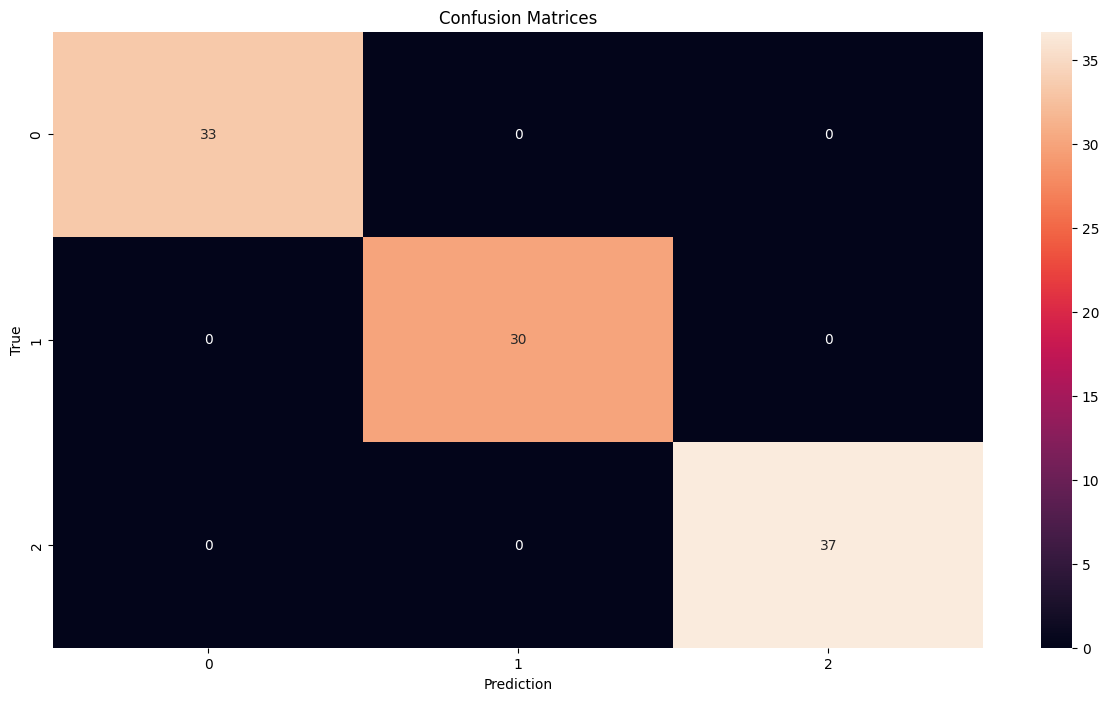

In [149]:
plt.figure(figsize=(15, 8)),
ax=sns.heatmap(cm(y_test, y_test_pred)/cm(y_test, y_test_pred).sum() * 100,
annot=True),
plt.title('Confusion Matrices'),
plt.ylabel('True'),
plt.xlabel('Prediction'),
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.